# <center>Biodiversity research</center>

## 0. Definition of goals and objectives of the project

- Which park has more biodiversity - the number of scientific names.
- Which park has the highest number of species with an extinction status.
- How many species are needed in total for the extinction status.
- Does it depend on the species?
- Category with the most frequent extinction status?

## 1. Data preparation and preliminary data review

### A) Import Python modules

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

### B) Loading the Data

In [2]:
obs = pd.read_csv('observations.csv')
spec_inf = pd.read_csv('species_info.csv')

### C) Explore the Data

In [3]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
spec_inf.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
obs.info()
spec_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
spec_inf.conservation_status.unique()
spec_inf.conservation_status = spec_inf.conservation_status.where(~spec_inf.conservation_status.isna(), other='Not Evaluated')
spec_inf.info()
spec_inf.conservation_status.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


array(['Not Evaluated', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### D) Data Wrangling, Cleaning and Tidying

According to the provided data in the "species_info.csv" table, some entries have missing values for the conservation status. 

These missing values indicate that certain species do not have a conservation status assigned, and they can be considered as structurally absent data. 

Therefore, at this stage, we can proceed with the data merging process without taking any specific actions for these missing values.

### E) Merging the Data

In [7]:
all_data=obs.merge(spec_inf, how='left')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  25632 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


## 2. Data analysis

### A) Let's view the distribution with and without the conservation status.

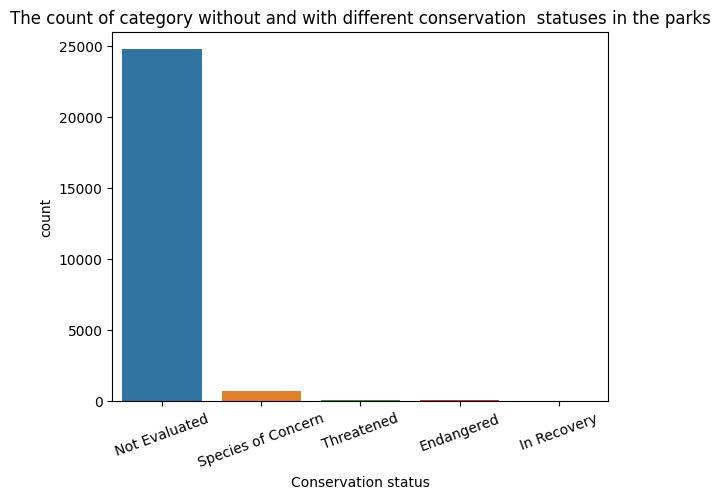

<Figure size 640x480 with 0 Axes>

In [8]:

sns.countplot(data=all_data, x='conservation_status')
plt.title('The count of category without and with different conservation  statuses in the parks')
plt.xticks(rotation=20)
plt.xlabel('Conservation status')
plt.show()
plt.clf()

The scale does not allow to see differences in the number of species of special conservation status.

A separate graph is needed to compare the number of species with conservation status.

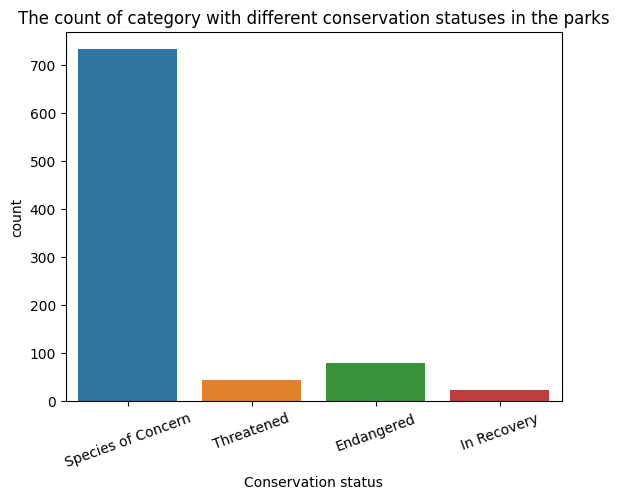

<Figure size 640x480 with 0 Axes>

In [9]:

sns.countplot(data=all_data[all_data.conservation_status!='Not Evaluated'], x='conservation_status')
plt.title('The count of category with different conservation statuses in the parks')
plt.xticks(rotation=20)
plt.xlabel('Conservation status')
plt.show()
plt.clf()

In [15]:
print('The ratio of living organisms with conservation status',round(100*len(all_data[all_data.conservation_status !=
      'Not Evaluated'])/len(all_data), 1), '%')
print('and this is approximately',round(100*np.sum(all_data[all_data.conservation_status !=
      'Not Evaluated'].observations)/np.sum(all_data.observations), 1), '% all observations in the parks')


The ratio of living organisms with conservation status 3.4 %
and this is approximately 2.8 % all observations in the parks


### B) Let's see what categories of living organisms are in the parks and which more often have a conservation status.

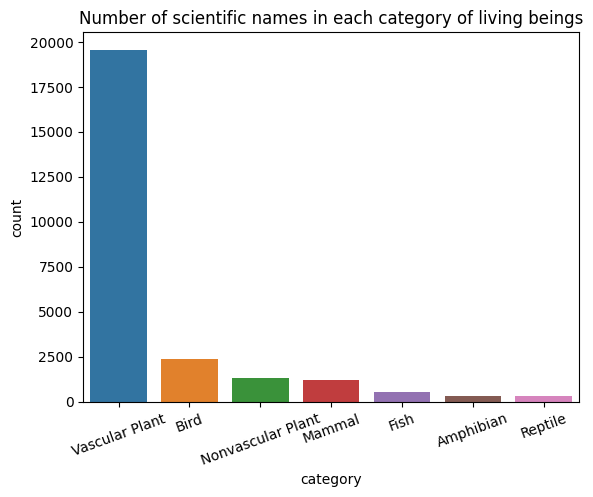

<Figure size 640x480 with 0 Axes>

In [16]:
ordering = all_data.category.value_counts().index
sns.countplot(data=all_data, x='category', order=ordering)
plt.title('Number of scientific names in each category of living beings')
plt.xticks(rotation=20)
plt.show()
plt.clf()

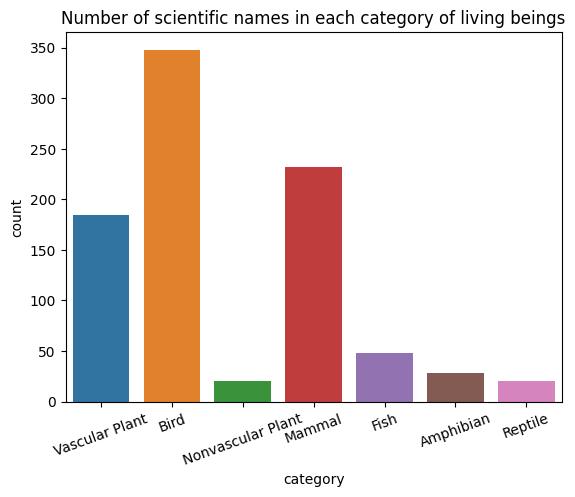

<Figure size 640x480 with 0 Axes>

In [59]:
sns.countplot(data=all_data[all_data.conservation_status!='Not Evaluated'], x='category', order=ordering)
plt.title('Number of scientific names in each category of living beings')
plt.xticks(rotation=20)
plt.show()
plt.clf()

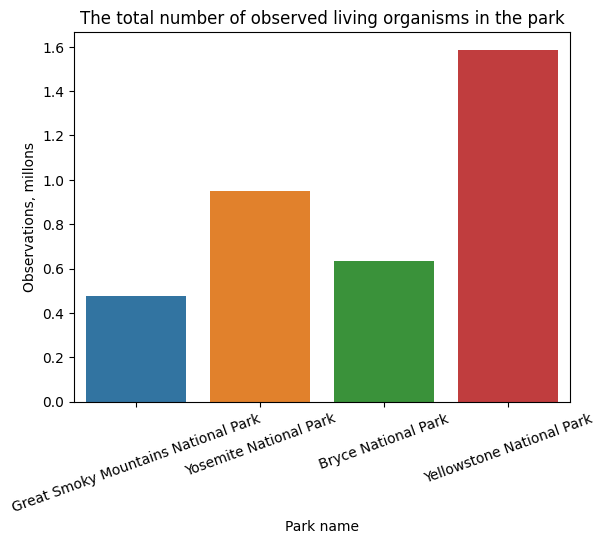

<Figure size 640x480 with 0 Axes>

In [72]:
def func(x):
    return sum(x)/1_000_000
sns.barplot(data=all_data, x='park_name', y='observations', estimator=func, errorbar=None)
plt.title('The total number of observed living organisms in the park')
plt.xlabel('Park name')
plt.ylabel('Observations, millons')
plt.xticks(rotation=20)
plt.show()
plt.clf()


In [19]:
sns.barplot(data=all_data[all_data.conservation_status=='In Recovery'], x='park_name', y='observations', estimator=func, errorbar=None)
plt.title('The total number of observed living organisms in the park')
plt.xlabel('Park name')
plt.ylabel('Observations, millons')
plt.xticks(rotation=20)
plt.show()
plt.clf()

NameError: name 'func' is not defined

## 3. Conclusions